# Aim
To find the amount of CO2 a vehivle emits based on various characteristics of the vehicle and to observe the how CO2 emissions vary with these parameters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
print("Done")

Done


## The Data

In [2]:
df = pd.read_csv("FCR_00to14.csv",encoding='latin1')

In [3]:
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km)
0,2000,ACURA,1.6EL,COMPACT,1.6,4.0,A4,X,9.2,6.7,8.1,35.0,186.0
1,2000,ACURA,1.6EL,COMPACT,1.6,4.0,M5,X,8.5,6.5,7.6,37.0,175.0
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6.0,AS5,Z,12.2,7.4,10.0,28.0,230.0
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6.0,A4,Z,13.4,9.2,11.5,25.0,264.0
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.0,7.0,8.6,33.0,198.0


In [4]:
print(df.shape)
df.describe()

(14274, 13)


,ENGINE SIZE (L),CYLINDERS,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS (g/km)
count,14253.000000,14253.000000,14253.000000,14253.000000,14253.000000,14253.000000,14253.000000
mean,3.477850,5.991230,12.934456,8.831348,11.089637,27.285624,248.790149
std,1.311102,1.774154,3.541439,2.338169,2.969484,7.425910,59.077190
min,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2.400000,4.000000,10.600000,7.200000,9.100000,22.000000,209.000000
50%,3.400000,6.000000,12.400000,8.300000,10.500000,27.000000,239.000000
75%,4.400000,8.000000,14.900000,10.200000,12.800000,31.000000,285.000000
max,8.400000,16.000000,30.600000,19.000000,24.800000,78.000000,570.000000


## Processing the Data

In [5]:
df.drop([df.columns[-2]],axis=1,inplace=True) #Dropping the mpg column
cdf = df[df.columns[[4,5,-2,-1]]] #Choosing the predictors and the response
cdf.head()

,ENGINE SIZE (L),CYLINDERS,COMB (L/100 km),CO2 EMISSIONS (g/km)
0,1.6,4.0,8.1,186.0
1,1.6,4.0,7.6,175.0
2,3.2,6.0,10.0,230.0
3,3.5,6.0,11.5,264.0
4,1.8,4.0,8.6,198.0


## Exploring the Data

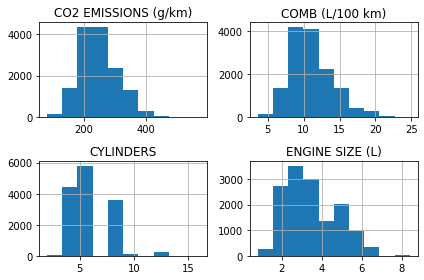

In [6]:
cdf.hist()
#Exploring the data
plt.tight_layout()

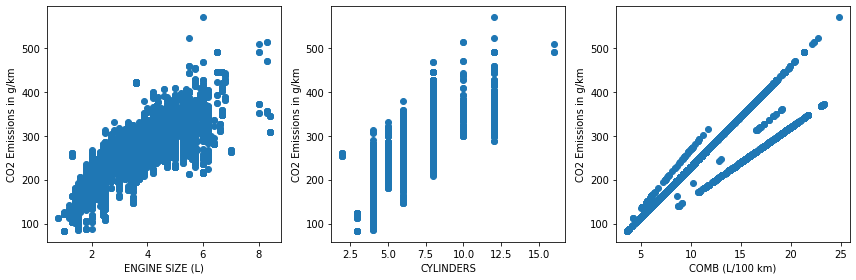

In [7]:
#Exploring the trends in the data
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(12,4))
for i,item in enumerate(cdf.columns[:-1]):
    ax[i].scatter(cdf[item],cdf['CO2 EMISSIONS (g/km)'])
    ax[i].set_xlabel(item)
    ax[i].set_ylabel('CO2 Emissions in g/km')
plt.tight_layout()

In [8]:
cdf.dropna(inplace=True)
len(cdf)

H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


14253

In [9]:
# Train Test split
bool1 = np.random.rand(len(cdf))<0.8
train = cdf[bool1]
test = cdf[~bool1]

### Simple Linear Regression

In [10]:
from sklearn.metrics import r2_score

ENGINE SIZE (L) vs CO2
Coeffecient:  [37.05481457] Intercept:  119.94198102454084
R^2:  0.6783400989576359
CYLINDERS vs CO2
Coeffecient:  [26.35998909] Intercept:  90.87561614529886
R^2:  0.6365600582972524
COMB (L/100 km) vs CO2
Coeffecient:  [18.17873355] Intercept:  47.09699316252471
R^2:  0.8462992089141452


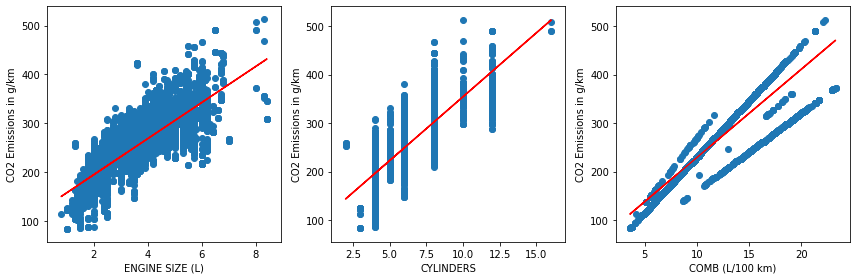

In [11]:
from sklearn.linear_model import LinearRegression
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(12,4))
lm = LinearRegression()
for i,item in enumerate(train.columns[:-1]):
    train_x = np.array(train[item]).reshape(-1,1)
    train_y = np.array(train['CO2 EMISSIONS (g/km)'])
    lm.fit(train_x,train_y)
    print(item,'vs','CO2')
    print('Coeffecient: ',lm.coef_,'Intercept: ',lm.intercept_)
    test_x = np.array(test[item]).reshape(-1,1)
    test_y_hat = lm.predict(test_x)
    test_y = np.array(test['CO2 EMISSIONS (g/km)'])
    r = r2_score(test_y,test_y_hat)
    print('R^2: ',r)
    train_y_hat = lm.predict(train_x)
    ax[i].plot(train_x,train_y_hat,'r')
    ax[i].scatter(train_x,train_y)
    ax[i].set_xlabel(item)
    ax[i].set_ylabel("CO2 Emissions in g/km")
plt.tight_layout()

### Polynomial Regression
From the graph above, it is evident that a non-linear model would fit better when Engine size is used as the predictor.

In [12]:
from sklearn.preprocessing import PolynomialFeatures

Coefficients:  [ 0.         61.27578571 -3.17657329] Intercept:  79.62267276515888
R^2:  0.6836554811675806


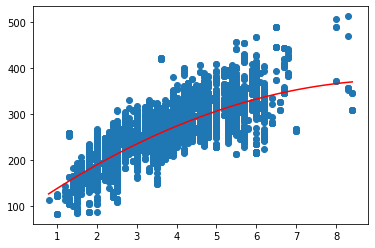

In [13]:
#Transforming
poly = PolynomialFeatures(degree=2)
train_x_2 = poly.fit_transform(np.array(train['ENGINE SIZE (L)']).reshape(-1,1))

#Fitting
lm2 = LinearRegression()
lm2.fit(train_x_2,train['CO2 EMISSIONS (g/km)'])
print('Coefficients: ',lm2.coef_,'Intercept: ',lm2.intercept_)

#Testing
test_x_2 = poly.fit_transform(np.array(test['ENGINE SIZE (L)']).reshape(-1,1))
test_y_hat = lm2.predict(test_x_2)
print('R^2: ',r2_score(test['CO2 EMISSIONS (g/km)'],test_y_hat))

#Plotting
x = np.linspace(np.array(train['ENGINE SIZE (L)']).min(),np.array(train['ENGINE SIZE (L)']).max(),100)
x_2 = poly.fit_transform(x.reshape(-1,1))
train_y_hat = lm2.predict(x_2)
plt.scatter(np.array(train['ENGINE SIZE (L)']),train['CO2 EMISSIONS (g/km)'])
plt.plot(x,train_y_hat,'r')
plt.xlabel('ENGINE SIZE (L)')
plt.ylabel('CO2 EMISSIONS (g/km)')

# Report
There seems to be a linear relation between CO2 Emissions and the number of cyclinders in the vehicle's engine. CO2 emissions also exhibits a linear relationship with the inverse mileage of a vehicle (L/Km).

We observe a non-linear relationship with the capacity of the Engine of the vehicle where the average rate of increase of emissions per litre of engine size, appears to plateau near large engine sizes.